In [33]:
%matplotlib inline
import numpy as np
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
names = np.array([
        'Parney',
        'Eddie',
        'Rich',
        'Vlad',
        'Boaz',
        'Frank',
        'Kyle',
        'Brad',
        'Rachel',
        'Kris'
    ])

original_chats = np.array([
        [0, 146, 94, 352, 4, 14, 4, 5, 1, 4],
        [48, 0, 39, 12, 1, 2, 0, 18, 0, 3],
        [1, 2, 0, 4, 2, 3, 3, 6, 2, 2], 
        [246, 15, 196, 0, 206, 41, 17, 16, 1, 32],
        [0, 2, 2, 74, 0, 0, 10, 3, 0, 0], 
        [4, 2, 2, 18, 18, 0, 0, 4, 0, 2],
        [1, 2, 1, 2, 1, 2, 0, 2, 1, 1],
        [2, 1, 2, 2, 1, 1, 1, 0, 1, 1],
        [0, 0, 23, 1, 0, 0, 3, 2, 0, 11],
        [0, 3, 8, 14, 0, 0, 9, 2, 5, 0]
    ])

chats = original_chats

{0: <matplotlib.text.Text at 0x1070e6b50>,
 1: <matplotlib.text.Text at 0x1070e6dd0>,
 2: <matplotlib.text.Text at 0x10701a250>,
 3: <matplotlib.text.Text at 0x10701a690>,
 4: <matplotlib.text.Text at 0x10701aad0>,
 5: <matplotlib.text.Text at 0x10701af10>,
 6: <matplotlib.text.Text at 0x107025390>,
 7: <matplotlib.text.Text at 0x1070257d0>,
 8: <matplotlib.text.Text at 0x107025c10>,
 9: <matplotlib.text.Text at 0x10702b090>}

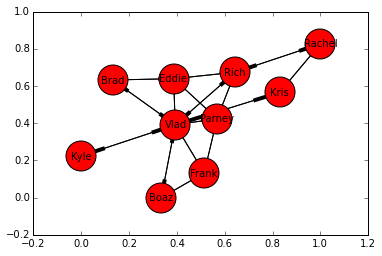

In [34]:
%matplotlib inline
import networkx as nx
import numpy.linalg
import matplotlib.pyplot as plt

G=nx.DiGraph()
edgelist = []

node_names = {0:'Parney', 1:'Eddie', 2:'Rich', 3:'Vlad', 4:'Boaz', 5:'Frank', 6:'Kyle', 7:'Brad', 8:'Rachel', 9:'Kris'}

for i in range(len(chats)):
    for j in range(len(chats)):
        if chats[i][j] > 10 or chats[j][i] > 10:
            G.add_edge(i, j, weight=3)
            edgelist.append((i, j))

pos=nx.spring_layout(G) # positions for all nodes

#node sizes
nx.draw_networkx_nodes(G, pos, nodelist=range(10), node_size=900)
nx.draw_networkx_edges(G, pos, edgelist=edgelist, width=1)
nx.draw_networkx_labels(G, pos, font_size=10, labels=node_names)

In [35]:
def normalize(mat):
    new_mat = []
    for row in mat:
        s = float(np.sum(row))
        new_row = [x/s for x in row]
        new_mat.append(new_row)
    return np.array(new_mat, float)
def set_zero_diag(mat):
    for i in range(len(mat)):
        for j in range(len(mat[i])):
            if j == i:
                mat[i][j] = 0
    return mat


#normalize rows, then transpose
chats = normalize(chats)
chats = chats.transpose()


# Do columns sum to 1?
print chats.transpose()[0]
print chats.transpose()[0].sum()


[ 0.       0.23397  0.15064  0.5641   0.00641  0.02244  0.00641  0.00801
  0.0016   0.00641]
1.0


In [36]:
print chats

[[ 0.       0.39024  0.04     0.31948  0.       0.08     0.07692  0.16667
   0.       0.     ]
 [ 0.23397  0.       0.08     0.01948  0.02198  0.04     0.15385  0.08333
   0.       0.07317]
 [ 0.15064  0.31707  0.       0.25455  0.02198  0.04     0.07692  0.16667
   0.575    0.19512]
 [ 0.5641   0.09756  0.16     0.       0.81319  0.36     0.15385  0.16667
   0.025    0.34146]
 [ 0.00641  0.00813  0.08     0.26753  0.       0.36     0.07692  0.08333
   0.       0.     ]
 [ 0.02244  0.01626  0.12     0.05325  0.       0.       0.15385  0.08333
   0.       0.     ]
 [ 0.00641  0.       0.12     0.02208  0.10989  0.       0.       0.08333
   0.075    0.21951]
 [ 0.00801  0.14634  0.24     0.02078  0.03297  0.08     0.15385  0.       0.05
   0.04878]
 [ 0.0016   0.       0.08     0.0013   0.       0.       0.07692  0.08333
   0.       0.12195]
 [ 0.00641  0.02439  0.08     0.04156  0.       0.04     0.07692  0.08333
   0.275    0.     ]]


In [37]:
vals, vecs = np.linalg.eig(chats)
print "First Eigenvalue"
print vals[0]
eig_names = [(names[i], vecs[0][i]) for i in range(len(names))]
sorted_names = sorted(eig_names, key=lambda x: x[1], reverse=True)
for n in sorted_names:
    print n

First Eigenvalue
(1+0j)
('Eddie', (0.46343451773339445+0j))
('Parney', (0.36555810912210129+0j))
('Rachel', (0.30674551020755714+0j))
('Kris', (0.25446950036266158+0j))
('Boaz', (0.13698094787433993+0.0026369428758755871j))
('Frank', (0.13698094787433993-0.0026369428758755871j))
('Brad', (-0.019931910658582797+0.13939919950989885j))
('Kyle', (-0.019931910658582797-0.13939919950989885j))
('Rich', (-0.45946661527913502+0j))
('Vlad', (-0.59532034997006822+0j))


In [42]:
chats_given = original_chats
named_chats = [(names[i], chats_given[i]) for i in range(len(original_chats))]
for line in named_chats:
    print line

('Parney', array([  0, 146,  94, 352,   4,  14,   4,   5,   1,   4]))
('Eddie', array([48,  0, 39, 12,  1,  2,  0, 18,  0,  3]))
('Rich', array([1, 2, 0, 4, 2, 3, 3, 6, 2, 2]))
('Vlad', array([246,  15, 196,   0, 206,  41,  17,  16,   1,  32]))
('Boaz', array([ 0,  2,  2, 74,  0,  0, 10,  3,  0,  0]))
('Frank', array([ 4,  2,  2, 18, 18,  0,  0,  4,  0,  2]))
('Kyle', array([1, 2, 1, 2, 1, 2, 0, 2, 1, 1]))
('Brad', array([2, 1, 2, 2, 1, 1, 1, 0, 1, 1]))
('Rachel', array([ 0,  0, 23,  1,  0,  0,  3,  2,  0, 11]))
('Kris', array([ 0,  3,  8, 14,  0,  0,  9,  2,  5,  0]))


In [47]:
Z = linkage(chats_given, 'ward')
print Z

[[   6.         7.         3.         2.     ]
 [   2.        10.         7.59386    3.     ]
 [   9.        11.        19.79478    4.     ]
 [   5.        12.        27.59529    5.     ]
 [   8.        13.        31.42716    6.     ]
 [   1.        14.        77.99847    7.     ]
 [   4.        15.        90.09063    8.     ]
 [   3.        16.       492.32219    9.     ]
 [   0.        17.       502.59617   10.     ]]


In [48]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(chats))
c

0.6474879391959395

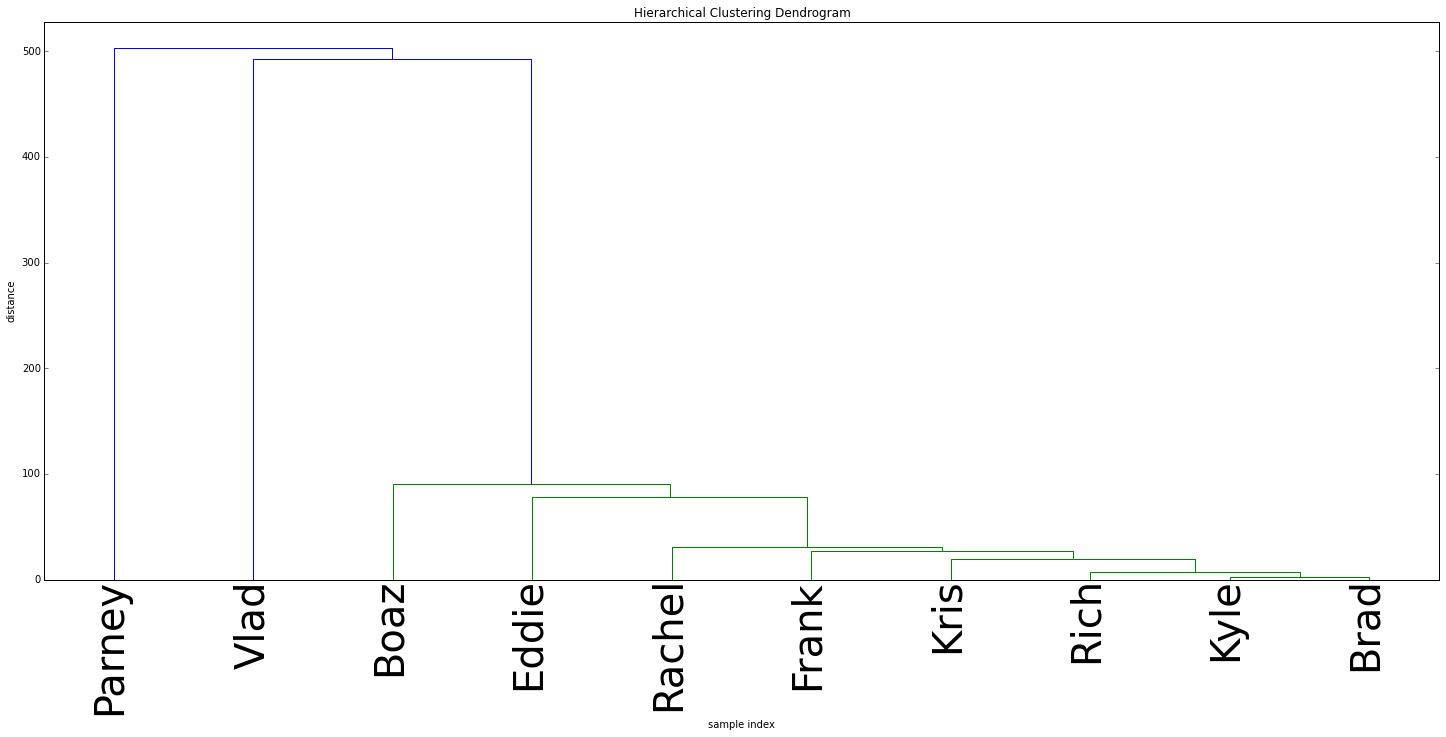

In [52]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=40.,  # font size for the x axis labels
    labels=names
)
plt.show()